# Bankruptcy Prediction Project
## 1. Data loading and initial exploration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./Bankruptcy_data_Final.csv", delimiter=';')

In [3]:
print(f"number of row: {df.shape[0]}")
print(f"number of columns: {df.shape[1]}")

number of row: 92872
number of columns: 15


In [4]:
df.head(10)

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1979,"0,980","1,580","0,360","0,180","0,130","1,330","1,770","0,070","0,150","2,220",NaN,NaN,NaN,0
1,1980,"0,980","1,410","0,360","0,190","0,120","1,310","1,590","0,070","0,130","2,410","0,126","0,014","0,040",0
2,1981,"0,870","0,310","0,320","0,130","0,080","1,030","1,550","0,050","0,040","2,560","0,368","0,328","0,567",0
3,1982,"1,130","0,710","0,280","0,140","0,080","0,800","1,390","0,060","0,050","5,280","-0,021","-0,119","-0,096",0
4,1983,"1,260","0,750","0,410","0,130","0,080","0,200","1,300","0,060","0,040","8,680","0,233","0,147","0,053",0
5,1984,"1,170","1,500","0,370","0,160","0,110","0,340","1,410","0,080","0,080","7,820","0,132","0,232","0,077",0
6,1985,"1,600","1,260","0,360","0,160","0,110","0,600","1,250","0,090","0,050","20,510","0,276","0,133","0,189",0
7,1986,"1,790","1,460","0,370","0,180","0,120","0,360","1,270","0,100","0,050","25,100","0,186","0,202","0,017",0
8,1987,"1,870","1,340","0,370","0,210","0,120","0,480","1,220","0,100","0,050","42,050","0,212","0,166","0,099",0
9,1988,"1,920","1,550","0,360","0,220","0,130","0,560","1,140","0,110","0,050","46,680","0,251","0,169","0,276",0


In [5]:
df.describe()

,Data Year - Fiscal,BK
count,92872.000000,92872.000000
mean,2004.105888,0.006008
std,9.875926,0.077280
min,1979.000000,0.000000
25%,1998.000000,0.000000
50%,2006.000000,0.000000
75%,2012.000000,0.000000
max,2017.000000,1.000000


In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)

print("number of missing values per column")
missing_values

number of missing values per column


Employee Growth       7010
Assets Growth         6701
Sales Growth          6701
Operational Margin    5557
Tobin's Q              252
Liquidity              247
Profitability          247
Productivity           247
Asset Turnover         247
Market Book Ratio       57
Leverage Ratio          26
Return on Equity         8
EPS                      5
Data Year - Fiscal       0
BK                       0
dtype: int64

In [7]:
print("BK distribution - counts")
df["BK"].value_counts()

BK distribution - counts


BK
0    92314
1      558
Name: count, dtype: int64

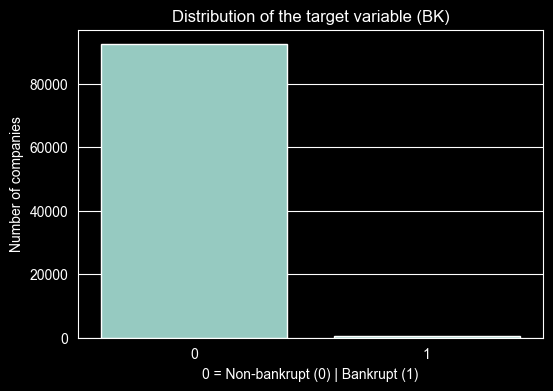

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x="BK", data=df)
plt.title("Distribution of the target variable (BK)")
plt.xlabel("0 = Non-bankrupt (0) | Bankrupt (1)")
plt.ylabel("Number of companies")
plt.show()

In [9]:
df.dtypes

Data Year - Fiscal     int64
Tobin's Q             object
EPS                   object
Liquidity             object
Profitability         object
Productivity          object
Leverage Ratio        object
Asset Turnover        object
Operational Margin    object
Return on Equity      object
Market Book Ratio     object
Assets Growth         object
Sales Growth          object
Employee Growth       object
BK                     int64
dtype: object

# 2. Data Preprocessing

### data type

In [10]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.replace(",", ".", regex=False)

        try:
            df[col] = df[col].astype(float)
        except ValueError:
            print(f"Column '{col}' could not be converted to float and was kept as object.")

In [11]:
df.dtypes

Data Year - Fiscal      int64
Tobin's Q             float64
EPS                   float64
Liquidity             float64
Profitability         float64
Productivity          float64
Leverage Ratio        float64
Asset Turnover        float64
Operational Margin    float64
Return on Equity      float64
Market Book Ratio     float64
Assets Growth         float64
Sales Growth          float64
Employee Growth       float64
BK                      int64
dtype: object

In [12]:
df.duplicated().sum()

np.int64(35)

In [13]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

print("number of detected outliers per numerical variable")
outlier_summary

number of detected outliers per numerical variable


{'Data Year - Fiscal': np.int64(0),
 "Tobin's Q": np.int64(10652),
 'EPS': np.int64(8396),
 'Liquidity': np.int64(4467),
 'Profitability': np.int64(14150),
 'Productivity': np.int64(13228),
 'Leverage Ratio': np.int64(10342),
 'Asset Turnover': np.int64(3706),
 'Operational Margin': np.int64(15574),
 'Return on Equity': np.int64(13061),
 'Market Book Ratio': np.int64(15997),
 'Assets Growth': np.int64(11973),
 'Sales Growth': np.int64(12419),
 'Employee Growth': np.int64(12679),
 'BK': np.int64(558)}